<a href="https://colab.research.google.com/github/terrysu64/Machine-Learning-and-Data-Science-Projects/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network regression 

Steps
1.   **Create model** - define i/o + hidden layers
2.   **Complile model** - define loss function + optimizer + eval. metrics
3.   **Fittting model** - let model find patterns



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
tf.__version__

'2.8.2'

### manually create data and fit

In [17]:
X = np.array([float(i) for i in range(-7,15,3)])
y = np.array([float(i) for i in range(3,25,3)])
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

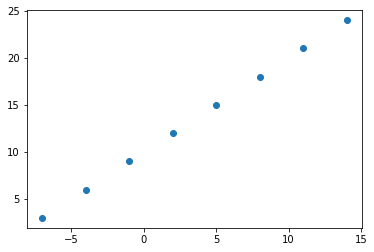

In [18]:
plt.scatter(X,y)

### i/o shapes

In [19]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
X[0].shape
tf.expand_dims(X, axis=-1)[0].shape

TensorShape([1])

### make neural network

In [27]:
tf.random.set_seed(42)

#1.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                      
])

#2.
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 387ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [28]:
#predictions
model.predict([1,2.4]) #predicts mae = 10 to 11

array([[0.79506004],
       [1.8381441 ]], dtype=float32)

### improving a model

In [ ]:
 #alter previous steps 
 #1. more layers, more hidden units, activation function...
 #2. learning rate, optimization function...
 #3. more epochs, more data....